In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Concrete_Data_Yeh.csv']


**Applying A Deep Neural Network**

In [2]:

#Importign libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Using TensorFlow backend.


In [3]:
#Importing the Dataset
df = pd.read_csv('../input/Concrete_Data_Yeh.csv')
x_org = df.drop('csMPa',axis=1).values
y_org = df['csMPa'].values



/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


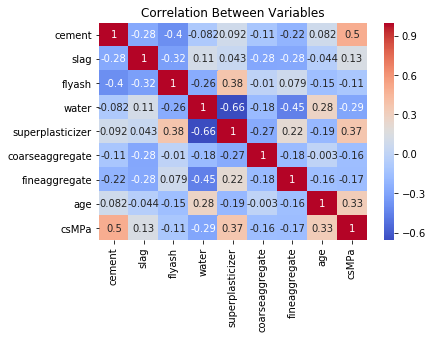

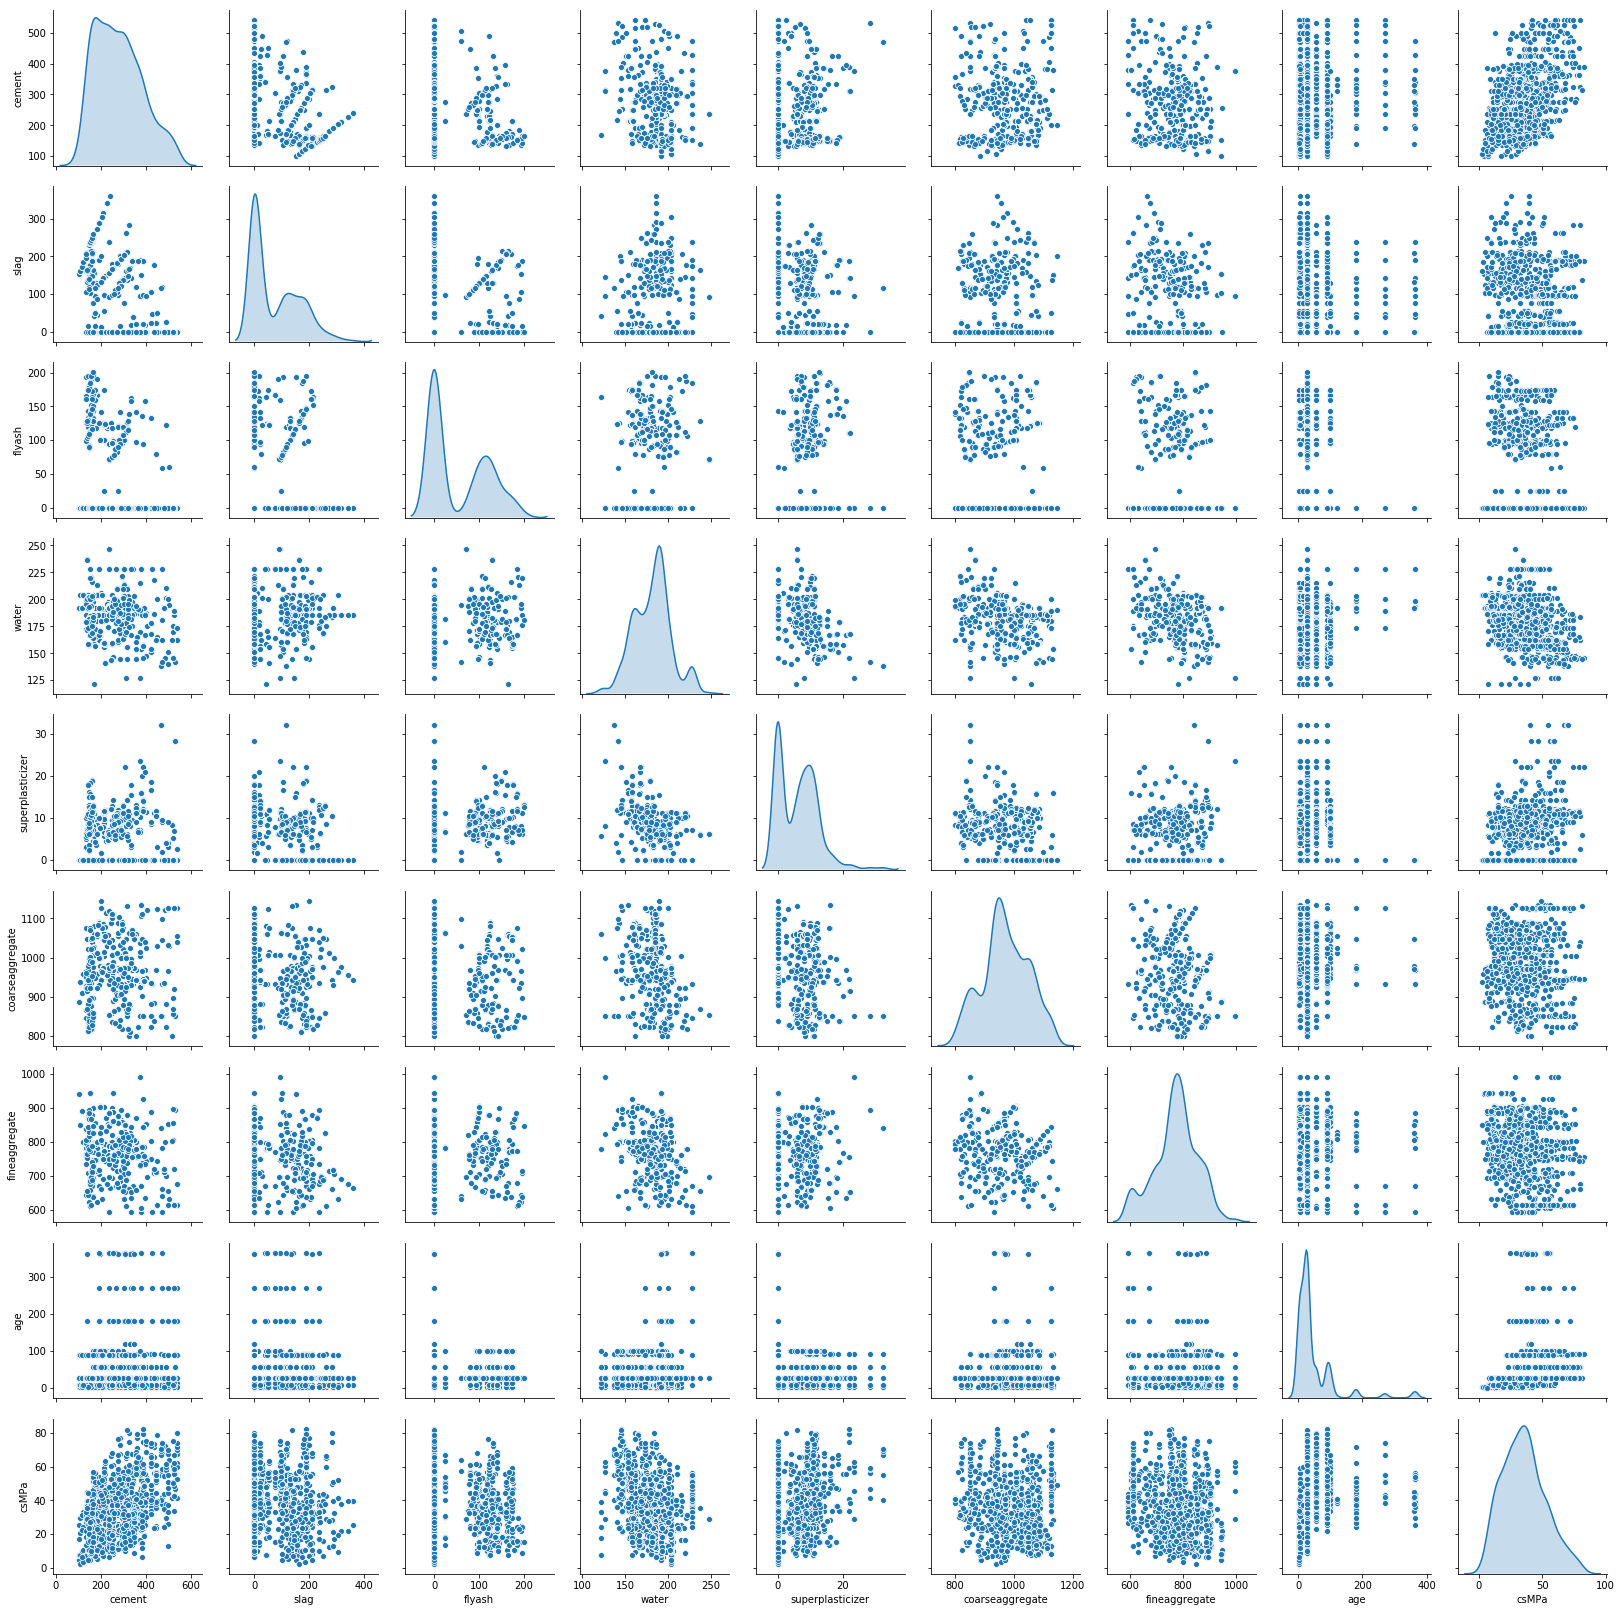

In [4]:
## Knowing The Data
# #Correlation heatmap
corr = df.corr()
sns.heatmap(corr,xticklabels=True,yticklabels=True,annot = True,cmap ='coolwarm')
plt.title("Correlation Between Variables")
plt.savefig('1.png')

# # pair Plot
sns.pairplot(df,palette="husl",diag_kind="kde")
plt.savefig('2.png')


In [5]:
# Using Test/Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_org,y_org, test_size=0.3)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [6]:
# Building ANN As a Regressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend



In [7]:
#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))



In [8]:
#Building  first layer Layers 
model=Sequential()

model.add(Dense(64,input_dim=8,activation = 'relu'))

# Bulding Second and third layer
model.add(Dense(32,activation='relu'))
model.add(keras.layers.normalization.BatchNormalization())

# Output Layer
model.add(Dense(1,activation='linear'))



Instructions for updating:
Colocations handled automatically by placer.


In [9]:
# Optimize , Compile And Train The Model 
opt =keras.optimizers.Adam(lr=0.0015)

model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse])
history = model.fit(X_train,y_train,epochs = 35 ,batch_size=32,validation_split=0.1)

print(model.summary())


Instructions for updating:
Use tf.cast instead.
Train on 648 samples, validate on 73 samples
Epoch 1/35
648/648 [==============================] - 1s 1ms/step - loss: 1477.2183 - rmse: 35.1778 - val_loss: 1832.3269 - val_rmse: 39.1676
Epoch 2/35
648/648 [==============================] - 0s 54us/step - loss: 1413.0785 - rmse: 34.9127 - val_loss: 1733.5320 - val_rmse: 38.5484
Epoch 3/35
648/648 [==============================] - 0s 52us/step - loss: 1356.7885 - rmse: 34.5709 - val_loss: 1625.6496 - val_rmse: 37.7759
Epoch 4/35
648/648 [==============================] - 0s 55us/step - loss: 1297.8576 - rmse: 34.1239 - val_loss: 1566.4516 - val_rmse: 37.4982
Epoch 5/35
648/648 [==============================] - 0s 53us/step - loss: 1234.1655 - rmse: 33.5654 - val_loss: 1483.4453 - val_rmse: 36.7326
Epoch 6/35
648/648 [==============================] - 0s 52us/step - loss: 1170.0141 - rmse: 32.8880 - val_loss: 1390.9786 - val_rmse: 35.7423
Epoch 7/35
648/648 [==============================

In [10]:
# Predicting and Finding R Squared Score

y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))


0.8437879838090898


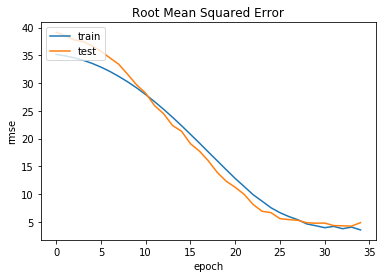

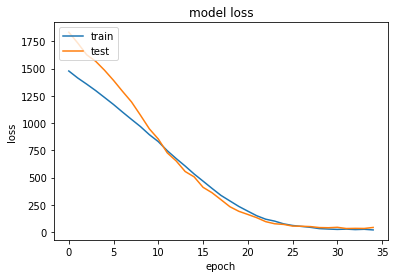

In [11]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('4.png')
plt.show()


***looks like a good Score***